In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Data Processing and EDA

In [3]:
#read in data
all_fund = pd.read_csv('all_companies_fund.csv') #2000-2019
all_bank = pd.read_csv('all_bankruptcies.csv', encoding = "ISO-8859-1") #2000-2019

C:\Users\Hannah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,33,37,955,956,957,962,972,976,977,982) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Hannah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (263,341) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#keys to join all databases
key_table = all_fund[['cik', 'GVKEY']] 
key_table = key_table.drop_duplicates()
key_table.head()

,cik,GVKEY
0,1750.0,1004
19,910627.0,1010
23,61478.0,1013
34,2668.0,1019
36,319126.0,1021


In [5]:
mask = all_fund['stalt'] == 'TL'
tl = all_fund[mask]
tl

,GVKEY,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,datadate,fyear,...,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
73,1045,P,01,NR,NaN,NaN,01/05/2012,11/30/2013,12/31/2012,2012.0,...,4.0,4512,605.0,600.0,B-,TX,0.0,www.aa.com,NaN,NaN
473,1164,P,01,NR,NaN,NaN,07/30/2002,03/31/2004,12/31/2002,2002.0,...,10.0,4813,463.0,974.0,NaN,NJ,0.0,www.wcom.com/home.shtml,01/09/2006,NaN
867,1263,N,01C,NU,NaN,NaN,12/01/2000,12/31/2001,12/31/2001,2001.0,...,6.0,3312,460.0,970.0,NaN,ON,2.0,www.algoma.com,NaN,NaN
868,1263,P,01,NR,NaN,NaN,12/01/2000,01/31/2002,12/31/2001,2001.0,...,6.0,3312,460.0,970.0,NaN,ON,2.0,www.algoma.com,NaN,NaN
1167,1388,C,00X,NU,NaN,NaN,01/01/1983,E,12/31/2011,2011.0,...,1.0,4512,605.0,600.0,NaN,TX,1.0,www.aa.com,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236932,273726,P,01,LC,93338.0,53385.0,04/15/2010,06/30/2018,12/31/2017,2017.0,...,2.0,1381,NaN,NaN,NaN,NaN,0.0,www.seadrill.com,NaN,04/15/2010
237802,294524,C,00X,NR,NaN,NaN,01/01/2006,04/29/2010,12/31/2009,2009.0,...,1.0,2820,NaN,NaN,B+,NaN,0.0,www.lyondellbasell.com,NaN,NaN
237889,296944,N,01,NR,NaN,NaN,01/29/2014,E,12/31/2017,2017.0,...,2.0,1381,NaN,NaN,NaN,NaN,3.0,www.nadlcorp.com,07/03/2018,NaN
237890,296944,P,02,LC,14417.0,54709.0,01/29/2014,07/03/2018,12/31/2017,2017.0,...,2.0,1381,NaN,NaN,NaN,NaN,3.0,www.nadlcorp.com,07/03/2018,NaN


In [6]:
all_fund[all_fund['GVKEY'] == 273726][['datadate','stalt','cik']]

,datadate,stalt,cik
236923,12/31/2008,NaN,1737706.0
236924,12/31/2009,NaN,1737706.0
236925,12/31/2010,NaN,1737706.0
236926,12/31/2011,NaN,1737706.0
236927,12/31/2012,NaN,1737706.0
236928,12/31/2013,NaN,1737706.0
236929,12/31/2014,NaN,1737706.0
236930,12/31/2015,NaN,1737706.0
236931,12/31/2016,NaN,1737706.0
236932,12/31/2017,TL,1737706.0


In [7]:
all_bank[all_bank['COMPANY_FKEY'] == 1737706]

,BANK_KEY,SUBSID_NAME,BANKRUPTCY_TYPE,LAW_COURT_FKEY,COURT_TYPE_CODE,COURT_NAME,COURT_S_NAME,COURT_LOC_STREET,COURT_LOC_CITY,COURT_LOC_STATE,...,HIWATER_INCMST_REVFY,HIWATER_INCMST_NETINC_QTR_DATE,HIWATER_INCMST_NETINC_QTR,HIWATER_INCMST_NETINC_TTM_DATE,HIWATER_INCMST_NETINC_TTM,HIWATER_INCMST_NETINC_FY_DATE,HIWATER_INCMST_NETINC_FY,NAME_CHANGE_DATE1,NAME_CHANGE_DATE2,NAME_CHANGE_DATE3


## Bankruptcy Data EDA

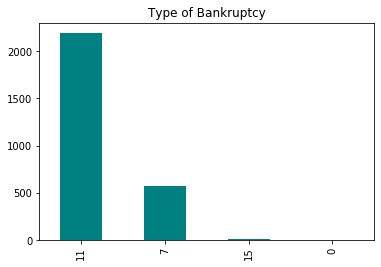

In [75]:
all_bank['BANKRUPTCY_TYPE'].value_counts().plot(title = 'Type of Bankruptcy', x = 'Filing', y = 'Frequency', kind = 'bar', color = 'teal')

In [12]:
#extract useful information
all_bank = all_bank[['BANKRUPTCY_TYPE', 'BANK_BEGIN_DATE', 'SIC_CODE_FKEY', 'SIC_CODE_DESCRIP', 'NAICS_CODE_DESCRIP', 'NAICS_CODE_FKEY', 'SHORT_NAME', 'NAME', 'COMPANY_FKEY']]

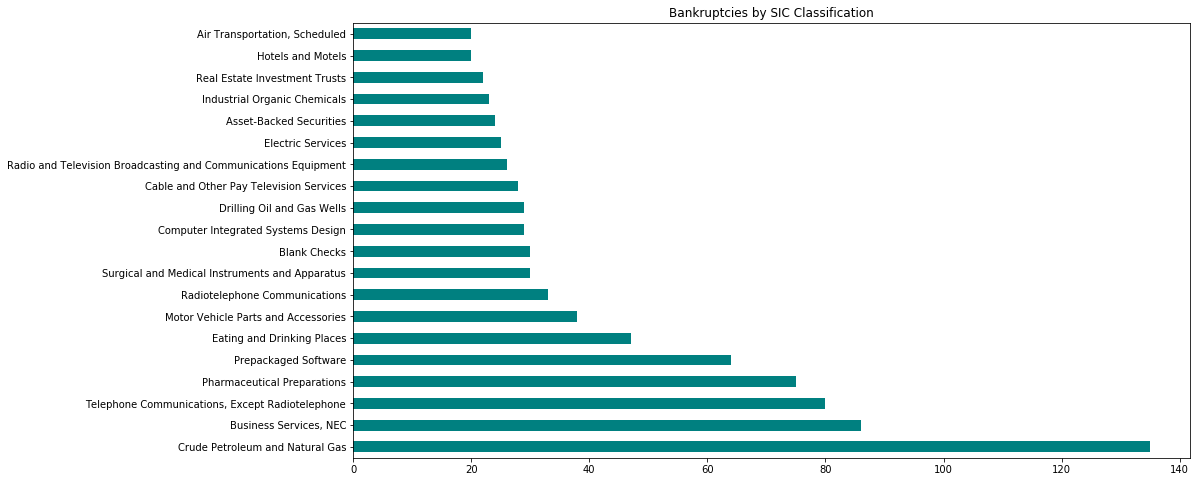

In [76]:
#top 20 industries with most bankruptcies using SIC code

all_bank['SIC_CODE_DESCRIP'].value_counts(ascending = False)[:20].plot.barh(title = 'Bankruptcies by SIC Classification', figsize = (15,8), color = 'teal')

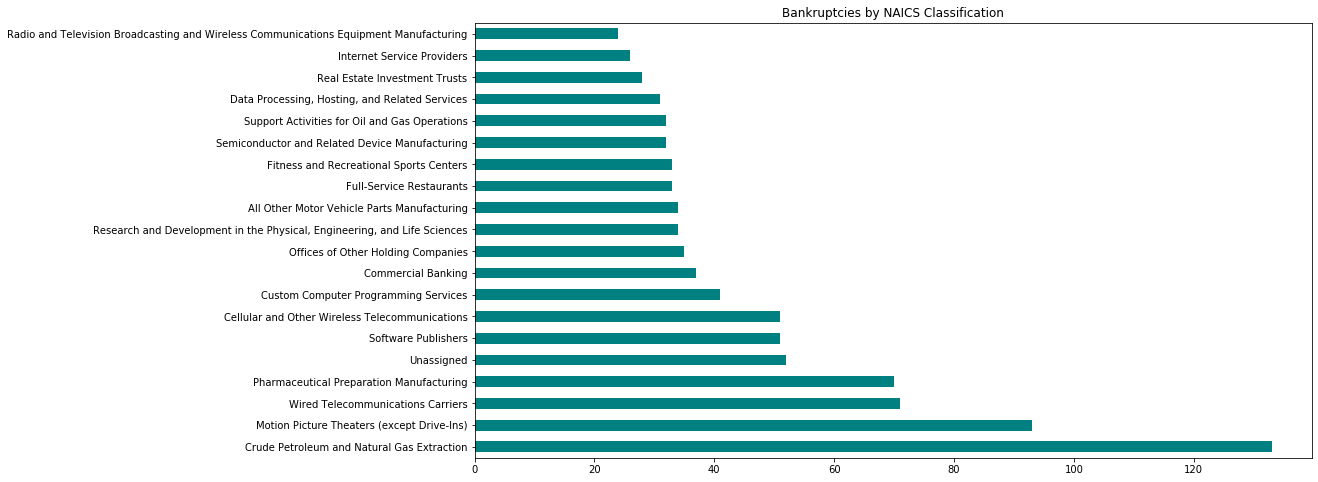

In [77]:
#top 20 industries with most bankruptcies using NAICS code

all_bank['NAICS_CODE_DESCRIP'].value_counts(ascending = False)[:20].plot.barh(title = 'Bankruptcies by NAICS Classification', figsize = (15,8), color = 'teal')

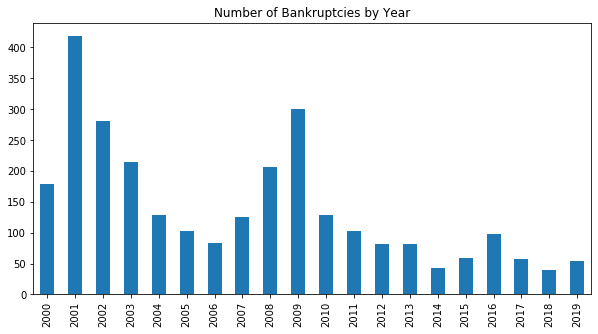

In [61]:
all_bank['year'] = pd.to_datetime(all_bank['BANK_BEGIN_DATE']).dt.year
all_bank['year'].value_counts().sort_index().plot(title = 'Number of Bankruptcies by Year', kind = 'bar', figsize = (10,5))

In [16]:
# gvkey_list = str(list(all_fund['GVKEY'].unique())).strip('\'').strip('[').strip(']').split(', ')

# # Write to txt file to look up relevant companies in Audit Analytics database
# # file = open('all_GVKEY.txt','w')
# # for i in all_fund['GVKEY']:
# #     file.write(str(i))
# #     file.write('\n')
# # file.close()

print(all_fund['GVKEY'].nunique(), 'of unique GVKEYs')
print(all_fund['cik'].nunique(), 'of unique ciks')
print('cik is the only way to join to bankruptcy data, might explain why so many bankruptcies were dropped')

24933 of unique GVKEYs
17998 of unique ciks
cik is the only way to join to bankruptcy data, might explain why so many bankruptcies were dropped


In [17]:
# all_bank.groupby(['year', 'NAICS_CODE_DESCRIP'])[['NAICS_CODE_DESCRIP']].count().unstack().to_csv('industrybank.csv')

In [18]:
# all_bank.groupby(['year', 'SIC_CODE_DESCRIP'])[['NAICS_CODE_DESCRIP']].count().unstack().to_csv('sicbank.csv')

In [19]:
all_bank.shape

(2779, 10)

In [20]:
f_keys = list(all_bank['COMPANY_FKEY'])

In [21]:
ciks = list(key_table['cik'])

In [62]:
#test how many bankrupt Fkeys are in fundamental
x = [] 
for i in f_keys:
    
    if i in ciks:
        continue
    
    else:
        x.append(i)
#         print (i, 'not in fundamental')

In [23]:
print('Of', len(f_keys), 'bankrupt companies,', len(x), 'companies are not in fundamental dataset')

Of 2779 bankrupt companies, 1085 companies are not in fundamental dataset


In [24]:
# # gvkey_list = str(list(all_fund['GVKEY'].unique())).strip('\'').strip('[').strip(']').split(', ')

# # Write to txt file to look up relevant companies in Audit Analytics database
# file = open('all_fkey.txt','w')
# for i in all_bank['COMPANY_FKEY']:
#     file.write(str(i))
#     file.write('\n')
# file.close()

In [25]:
#used bankruptcy Fkey to query fundamental data, turns out a lot of ciks do not return fundamental data
fund_bank = pd.read_csv('fund_bank.csv')
fund_bank['cik'].nunique()

C:\Users\Hannah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (23,33,955,956,958,959,965,976,977,980,981,982,983,985,989,995,996,999,1002,1005,1010,1017,1018,1021,1025,1030,1033,1034,1039,1049,1050,1055,1056,1057,1058,1059,1060,1061,1065,1066,1069,1070,1072,1074,1076,1077,1081,1082,1083,1093,1095,1099,1100,1107,1111,1112,1113,1114,1116,1120,1127,1134,1137,1141,1144,1145,1146,1148,1149,1150,1159,1160,1162,1163,1164,1165,1167,1168,1829,1830,1836,1850,1851) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1798

In [26]:
print('will move forward with the companies with fundamental data')
print('might be benefitial to figure out why so many companies do not have fundamental data')

will move forward with the companies with fundamental data
might be benefitial to figure out why so many companies do not have fundamental data


## Merge fundamental and bankruptcy and financial ratios


In [27]:
fund_bank = pd.merge(all_fund, all_bank, left_on = 'cik', right_on = 'COMPANY_FKEY', suffixes = ('_fund', '_bank'), how = 'left')
fund_bank['cik'].nunique()

17998

In [28]:
bankrupt_key  = pd.merge(all_bank, key_table, left_on = 'COMPANY_FKEY', right_on = 'cik', suffixes = ('_ratio', '_key'), how = 'inner')


In [29]:
all_fin_ratios  = pd.read_csv('all_fin_ratios.csv')

In [30]:
#only keep year end financial ratios for each company
all_fin_ratios=all_fin_ratios.drop_duplicates(subset=['gvkey','qdate'], keep='last')
all_fin_ratios['qmonth']=pd.to_datetime(all_fin_ratios['qdate']).dt.month
mask= all_fin_ratios['qmonth']==12
all_fin_ratios= all_fin_ratios[mask]

all_fin_ratios.shape

(75263, 76)

In [63]:
fin_gv = list(all_fin_ratios['gvkey'].unique())

fund_gv = list(all_fund['GVKEY'].unique())

#test how many bankrupt Fkeys are in fundamental
x = [] 
for i in fin_gv:
    
    if i in fund_gv:
        continue
    
    else:
        x.append(i)
#         print (i, 'not in fundamental')

In [32]:
print('Of', len(fin_gv), 'companies with financial ratios', len(x), 'companies are not in fundamental dataset')

Of 9466 companies with financial ratios 560 companies are not in fundamental dataset


In [33]:
fin_ratio_bankruptcy = pd.merge(all_fin_ratios, bankrupt_key, left_on = 'gvkey', right_on = 'GVKEY', suffixes = ('_finratio', '_bankrupt'), how = 'left')


In [34]:
mask = pd.to_datetime(fin_ratio_bankruptcy['adate']).dt.year + 1 == pd.to_datetime(fin_ratio_bankruptcy['BANK_BEGIN_DATE']).dt.year

fin_ratio_bankruptcy['bankrupted'] = np.where(mask, 1,0)

In [35]:
#might want to check why so few bankruptcies exist in this final merge dataset
fin_ratio_bankruptcy['bankrupted'].sum()

518

In [36]:
fin_ratio_bankruptcy['year'] = pd.to_datetime(fin_ratio_bankruptcy['adate']).dt.year
all_fund['year'] =  pd.to_datetime(all_fund['datadate']).dt.year


In [37]:
fund_ratio_bank  = pd.merge(all_fund, fin_ratio_bankruptcy, left_on = ['GVKEY', 'year'], right_on = ['gvkey', 'year'], suffixes = ('_fund', '_ratio'), how = 'inner')
fund_ratio_bank = fund_ratio_bank.drop(columns = 'GVKEY_ratio')
fund_ratio_bank = fund_ratio_bank.rename(columns = {'GVKEY_fund' : 'GVKEY'})

In [38]:
print('The final dataset includes:',fund_ratio_bank['GVKEY'].nunique(), 'companies, which have fundamental as well as financial ratios values, and', fund_ratio_bank['bankrupted'].sum(), 'bankruptcies')

The final dataset includes: 8673 companies, which have fundamental as well as financial ratios values, and 511 bankruptcies


## Final EDA

In [39]:
#filter for market cap size (in MM)
#recommend using this after creating bankruptcy dummy

def market_cap_size(df, lower, upper):
    
    mask = ((df['mkvalt'] >=lower) & (df['mkvalt'] <=upper))
    df =df[mask]
    
    return df


# #market cap 500M - 1B
# df500 = market_cap_size(fund_ratio_bank, 0,1000)

# df500['GVKEY'].nunique()

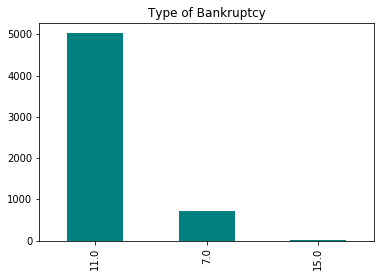

In [78]:
fund_ratio_bank['BANKRUPTCY_TYPE'].value_counts().plot(title = 'Type of Bankruptcy', x = 'Filing', y = 'Frequency', kind = 'bar', color = 'teal')

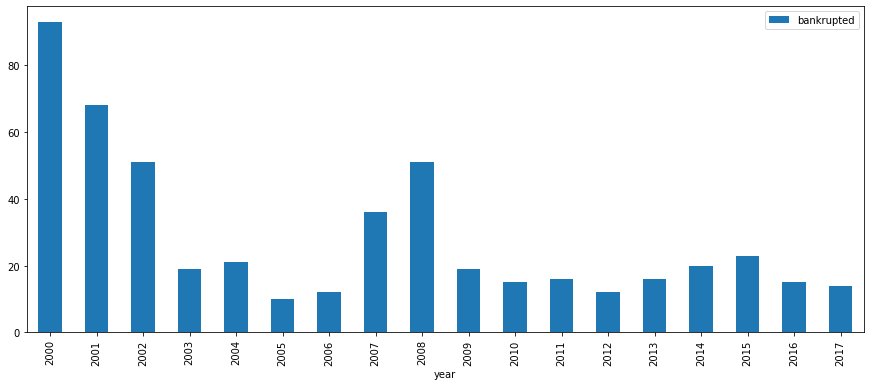

In [40]:
fund_ratio_bank.groupby('year')[['bankrupted']].sum().plot(kind = 'bar', figsize = (15,6))

In [41]:
final_bank = fund_ratio_bank [fund_ratio_bank['bankrupted']==1]

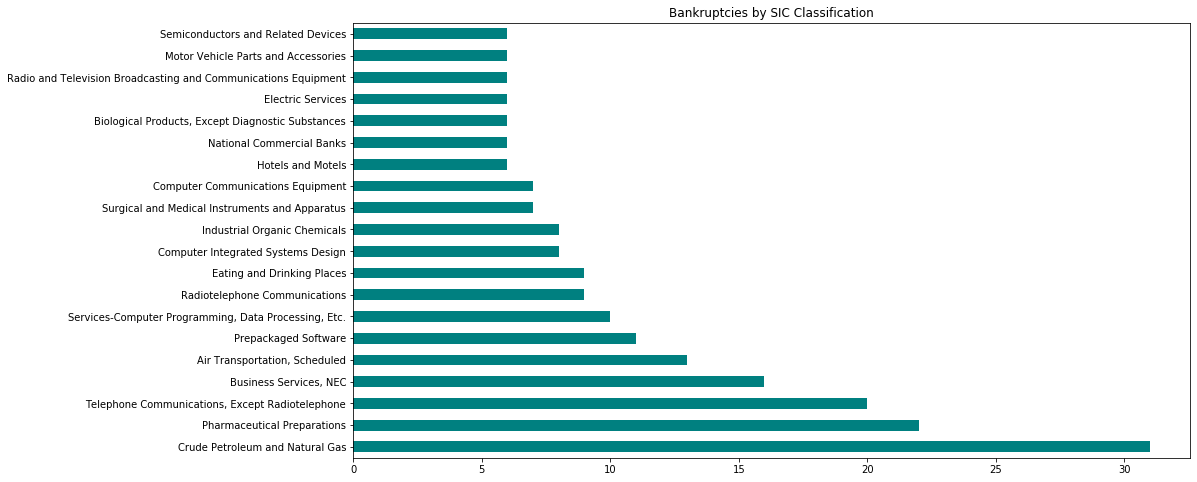

In [81]:
final_bank['SIC_CODE_DESCRIP'].value_counts(ascending = False)[:20].plot.barh(title = 'Bankruptcies by SIC Classification', color='teal', figsize = (15,8))

most bankrptcies happened with companies with small market caps


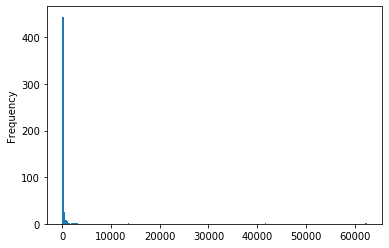

In [43]:
#bankrupt companies usually have small market caps
final_bank['mkvalt'].plot(kind = 'hist', bins = 200)#.value_counts(ascending = False)[:20].plot(kind = 'bar', figsize = (15,8))
print('most bankrptcies happened with companies with small market caps')

## Next steps:
1. figure out why so many bankrupted companies do not have fundamental data (is it how the database was constructed? fundamental dataset would get rid of bankrupted or acquired companies?)

2. figure out why only 500 or so bankruptcies exist in the final dataset, down from 1000 (bankrupt companies with fundamental data) --> hypothesis is some fin ratios companies do not have fundamental data and those happen to be the ones with bankrupt data. Need to check 

3. model development. Note that the current dataset includes data from 2000 - 2019. Need to filter out dates


# Modeling

In [44]:
mask = (fund_ratio_bank['fyear'] >= 2000) & (fund_ratio_bank['fyear'] <= 2010)

df_2000_2010 = fund_ratio_bank[mask]

In [45]:
mask = (fund_ratio_bank['fyear'] == 2011)

df_2011 = fund_ratio_bank[mask]

In [46]:
lista=[]
for i in all_fin_ratios.columns:
    lista.append(i)

In [47]:
lista.append('bankrupted')
lista.append('fyear')

In [48]:
df_2000_2010 = df_2000_2010[lista]
df_2011 = df_2011[lista]


In [49]:
df_2000_2010 = df_2000_2010.drop(columns = ['gvkey'])
df_2011 = df_2011.drop(columns = ['gvkey'])

In [50]:
mask = (df_2000_2010['fyear'] >= 2000) & (df_2000_2010['fyear'] <= 2007)
train=df_2000_2010[mask]
test= df_2000_2010[-mask]

In [51]:
y_train= train['bankrupted']
x_train= train.drop(columns=['bankrupted'])
y_test= test['bankrupted']
x_test= test.drop(columns=['bankrupted'])

In [52]:
x_train=x_train.drop(columns=['adate','qdate','fyear','public_date','qmonth'])
x_test=x_test.drop(columns=['adate','qdate','fyear','public_date','qmonth'])

In [53]:
def get_pct(column):
    
    column = float(str(column).rstrip('%')) 
    
    return column

x_train['DIVYIELD'] = x_train['DIVYIELD'].apply(get_pct)
x_test['DIVYIELD'] = x_test['DIVYIELD'].apply(get_pct)

# CatBoost Model

In [54]:
x_train = x_train.astype(str)
x_test = x_test.astype(str)
y_train = y_train.astype(str)
y_test = y_test.astype(str)

In [66]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, roc_auc_score


In [67]:
model = CatBoostClassifier(
    iterations=5,
    learning_rate=0.07736700028181076,
    scale_pos_weight=99
    # loss_function='CrossEntropy'
)
categorical_features_indices = np.where(x_train.dtypes != np.float)[0]

model.fit(
    x_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(x_test, y_test),
    verbose=False
)

In [68]:
# Get predicted classes
preds_class = model.predict(x_test)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(x_test)
# Get predicted RawFormulaVal
preds_raw = model.predict(x_test, prediction_type='RawFormulaVal')

In [69]:
accuracy_score(preds_class,y_test)

0.8297136778654375

In [70]:
preds_class= pd.Series(preds_class)

In [71]:
# precision tp / (tp + fp)
precision = precision_score(y_test, preds_class, pos_label='1')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, preds_class,pos_label='1')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, preds_class,pos_label='1')
print('F1 score: %f' % f1)
roc = roc_auc_score(y_test.astype(int), preds_class.astype(int))
print('AUC_ROC: %f' % roc)

Precision: 0.037821
Recall: 0.852273
F1 score: 0.072429
AUC_ROC: 0.840905


In [72]:
model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 5,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 1,
 'model_size_reg': 0.5,
 'approx_on_full_history': False,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform

# Tuning the parameter

In [74]:
f1list=[]

for x in range(0,200):
    model = CatBoostClassifier(
        iterations=5,
        learning_rate=0.1,
        scale_pos_weight=x
        # loss_function='CrossEntropy'
    )
    categorical_features_indices = np.where(x_train.dtypes != np.float)[0]

    model.fit(
        x_train, y_train,
        cat_features=categorical_features_indices,
        eval_set=(x_test, y_test),
        verbose=False
    )
    # Get predicted classes
    preds_class = model.predict(x_test)
    # Get predicted probabilities for each class
    preds_proba = model.predict_proba(x_test)
    # Get predicted RawFormulaVal
    preds_raw = model.predict(x_test, prediction_type='RawFormulaVal')

    accuracy_score(preds_class,y_test)

    preds_class= pd.Series(preds_class)

    # precision tp / (tp + fp)
    precision = precision_score(y_test, preds_class, pos_label='1')
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, preds_class,pos_label='1')
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, preds_class,pos_label='1')
    
    f1list.append(f1)


C:\Users\Hannah\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CatBoostError: (The process cannot access the file because it is being used by another process.) c:/goagent/pipelines/buildmaster/catboost.git/util/system/file.cpp:797: can't open "catboost_info\\catboost_training.json" with mode CreateAlways (0x00000004)

In [ ]:
pos= f1list.index(max(f1list)) 

In [ ]:
pos
#29

In [ ]:
    model = CatBoostClassifier(
        iterations=5,
        learning_rate=0.07736700028181076,
        scale_pos_weight=29
        # loss_function='CrossEntropy'
    )
    categorical_features_indices = np.where(x_train.dtypes != np.float)[0]

    model.fit(
        x_train, y_train,
        cat_features=categorical_features_indices,
        eval_set=(x_test, y_test),
        verbose=False
    )
    # Get predicted classes
    preds_class = model.predict(x_test)
    # Get predicted probabilities for each class
    preds_proba = model.predict_proba(x_test)
    # Get predicted RawFormulaVal
    preds_raw = model.predict(x_test, prediction_type='RawFormulaVal')

    accuracy_score(preds_class,y_test)

    preds_class= pd.Series(preds_class)

    precision = precision_score(y_test, preds_class, pos_label='1')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, preds_class,pos_label='1')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, preds_class,pos_label='1')
print('F1 score: %f' % f1)
roc = roc_auc_score(y_test.astype(int), preds_class.astype(int))
print('AUC_ROC: %f' % roc)

In [ ]:
    model = CatBoostClassifier(
        scale_pos_weight=29
        # loss_function='CrossEntropy'
    )
    categorical_features_indices = np.where(x_train.dtypes != np.float)[0]

    model.fit(
        x_train, y_train,
        cat_features=categorical_features_indices,
        eval_set=(x_test, y_test),
        verbose=False
    )
    # Get predicted classes
    preds_class = model.predict(x_test)
    # Get predicted probabilities for each class
    preds_proba = model.predict_proba(x_test)
    # Get predicted RawFormulaVal
    preds_raw = model.predict(x_test, prediction_type='RawFormulaVal')

    accuracy_score(preds_class,y_test)

    preds_class= pd.Series(preds_class)

    precision = precision_score(y_test, preds_class, pos_label='1')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, preds_class,pos_label='1')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, preds_class,pos_label='1')
print('F1 score: %f' % f1)

In [ ]:
roc = roc_auc_score(y_test.astype(int), preds_class.astype(int))
print('AUC_ROC: %f' % roc)

In [ ]:
model.get_all_params()

In [ ]:
model.get_feature_importance()

In [ ]:

feature_score = pd.DataFrame(list(zip(x_train.dtypes.index, model.get_feature_importance(Pool(x_train, label=y_train, cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

In [ ]:
plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

# get feature score as labels round to 2 decimal
labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()